In [3]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
loc = "datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc"

locations = {
    "sliding [1s, 50ms]": "datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc",
    "sliding [1m, 50ms]": "datasets/NES/221123/sliding_1min-50ms_100_20_3w_oc",
    "tumbling [1s]": "datasets/NES/201123/1sec_100_20_3w_oc",
    "tumbling [1m]": "datasets/NES/201123/1min_100_20_3w_oc"
}

measurements_debs = {
    "no_stress": {
        "bottom-up": "/bottomUpDebsThreeLevel/bottomUpDebsThreeLevel.out",
        "top-down": "/topDownDebsThreeLevel/topDownDebsThreeLevel.out",
        "nemo": "/nemoDebsThreeLevel/nemoDebsThreeLevel.out",
        "mst": "/bottomUpDebsMst/bottomUpDebsMst.out",
        "chain": "/bottomUpDebsChain/bottomUpDebsChain.out"
    },
    "stress": {
        "bottom-up": "/bottomUpDebsThreeLevel_stress/bottomUpDebsThreeLevel.out",
        "top-down": "/topDownDebsThreeLevel_stress/topDownDebsThreeLevel.out",
        "nemo": "/nemoDebsThreeLevel_stress/nemoDebsThreeLevel.out",
        "mst": "/bottomUpDebsMst_stress/bottomUpDebsMst.out",
        "chain": "/bottomUpDebsChain_stress/bottomUpDebsChain.out"
    }
}

measurements_debs["no_stress"]["optimal"] = measurements_debs["no_stress"]["bottom-up"] 
measurements_debs["stress"]["optimal"] = measurements_debs["stress"]["nemo"] 

approach_order = [
    "mst",
    "chain",
    "top-down",
    "bottom-up",
    "nemo",
    "optimal"
]

In [12]:
color_list = sns.color_palette(n_colors=10)
color_dict = {}
for i, k in enumerate(approach_order):
    color_dict[k] = color_list[i]
color_list

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Read Measurements

In [13]:
latency_cols = ["start", "end", "id", "start_ts", "arrival"]
ref_col = "start_ts"

latency_results = {}

for experiment, loc in locations.items():
    print(experiment)
    experiment_metrics = {
        "latencies": {},
        "90th percentile": {}
    }

    for approach in approach_order:
        for stress_label in measurements_debs.keys():
            path = loc + measurements_debs[stress_label][approach]
            if stress_label.startswith("stress"):
                label = approach + " stress"
            else:
                label = approach

            print(approach, path)
            df = pd.read_csv(path, skiprows=1, names=latency_cols)
            df["latency"] = df["arrival"] - df["end"]
            # df = df[df["latency"] > 0]
            # print(df[df["latency"] <= 0]["latency"].count())

            latencies = df["latency"].to_list()
            experiment_metrics["latencies"][label] = latencies
            experiment_metrics["90th percentile"][label] = np.percentile(latencies, 90)
    latency_results[experiment] = experiment_metrics

sliding [1s, 50ms]
mst datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/bottomUpDebsMst/bottomUpDebsMst.out
mst datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/bottomUpDebsMst_stress/bottomUpDebsMst.out
chain datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/bottomUpDebsChain/bottomUpDebsChain.out
chain datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/bottomUpDebsChain_stress/bottomUpDebsChain.out
top-down datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/topDownDebsThreeLevel/topDownDebsThreeLevel.out
top-down datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/topDownDebsThreeLevel_stress/topDownDebsThreeLevel.out
bottom-up datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/bottomUpDebsThreeLevel/bottomUpDebsThreeLevel.out
bottom-up datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/bottomUpDebsThreeLevel_stress/bottomUpDebsThreeLevel.out
nemo datasets/NES/221123/sliding_1sec-50ms_100_20_3w_oc/nemoDebsThreeLevel/nemoDebsThreeLevel.out
nemo datasets/NES/221123/sliding_1sec-50m

In [14]:
latency_results.keys()

dict_keys(['sliding [1s, 50ms]', 'sliding , 50ms]', 'tumbling [1s]', 'tumbling [1m]'])

In [15]:
latency_results[list(latency_results.keys())[0]].keys()

dict_keys(['latencies', '90th percentile'])

In [16]:
latency_results[list(latency_results.keys())[0]]["latencies"].keys()

dict_keys(['mst', 'mst stress', 'chain', 'chain stress', 'top-down', 'top-down stress', 'bottom-up', 'bottom-up stress', 'nemo', 'nemo stress', 'optimal', 'optimal stress'])

In [17]:
experiment = "sliding [1s, 50ms]"
latency_vals = latency_results[experiment]["latencies"]

## Scatter Plot

mst 36094
mst stress 36213
chain 36069
chain stress 36078
top-down 3061
top-down stress 2419
bottom-up 36452
bottom-up stress 36265
nemo 24864
nemo stress 30968
optimal 36452
optimal stress 30968


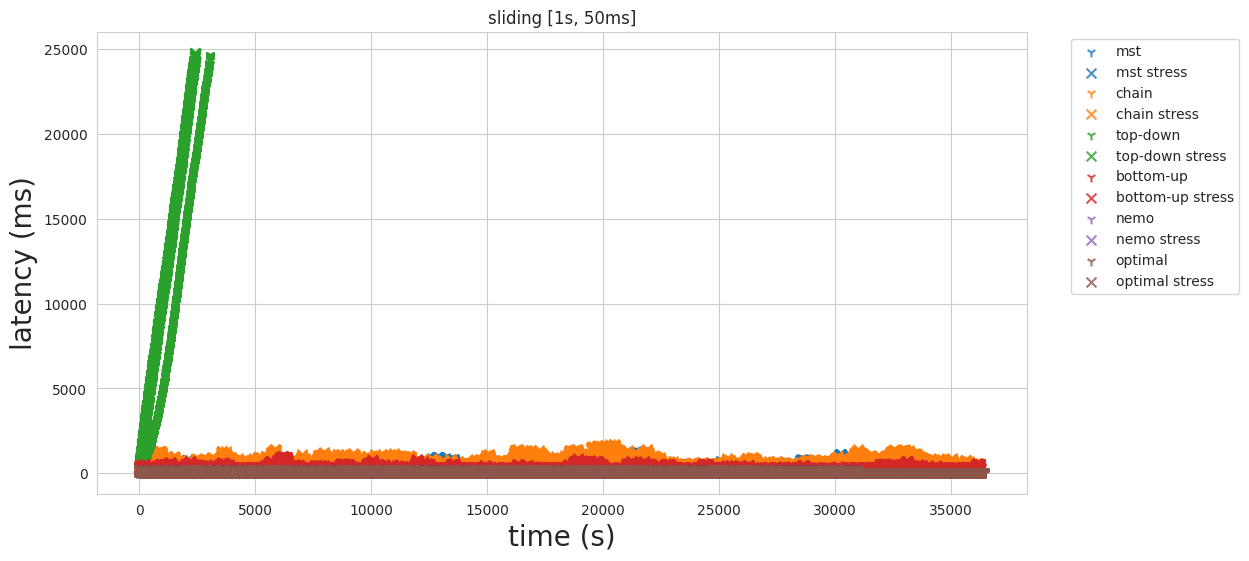

In [18]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(12, 6))
min_ns = sys.maxsize
min_s = sys.maxsize

i = 1
for k, v in latency_vals.items():
    print(k, len(v))
    if k.endswith("stress"):
        marker = "x"
        if len(v) < min_s:
            min_s = len(v)
    else:
        marker = "1"
        if len(v) < min_ns:
            min_ns = len(v)

    ax.scatter([i for i in range(len(v))], v, label=k, s=50, alpha=0.8, marker=marker,
               color=color_dict[k.replace(" stress", "")])
    i = i + 1

# set the axis labels and title
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('latency (ms)', fontsize=20)

# Set the legend
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# show the plot
plt.title(experiment)
plt.show()

## Box plots

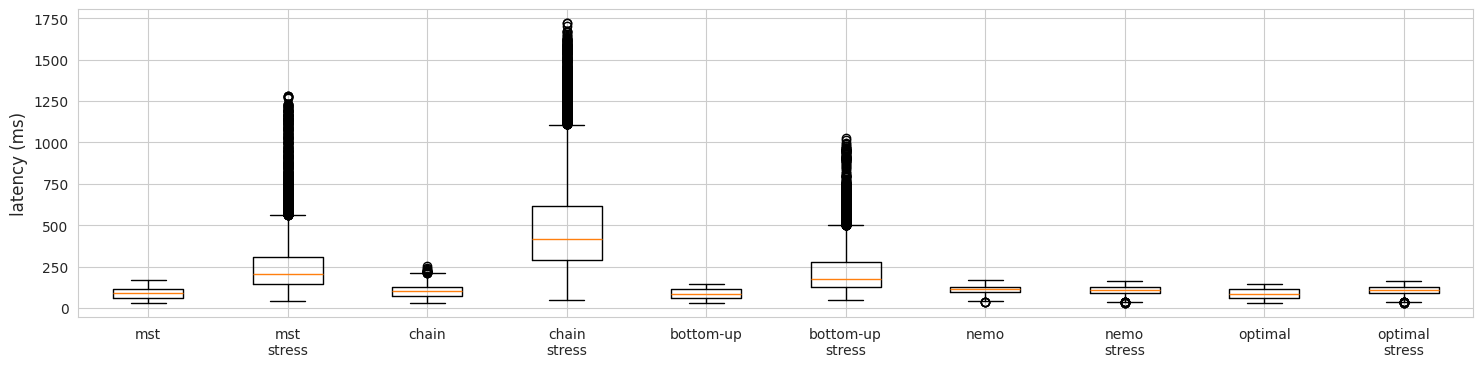

In [19]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

plot_latencies = {}
for k, v in latency_vals.items():
    if not k.startswith("top-down"):
        plot_latencies[k] = v

# Extract the keys and values from the measurements dictionary
labels = plot_latencies.keys()
values = plot_latencies.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)

plt.savefig("plots/NES/latency_boxplot_no_td.svg", bbox_inches="tight")

# Display the plot
# plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

## Scatter Quantiles

In [20]:
percentiles = [85, 90, 95, 99]
approaches = []
values = []
perc_label = []

for k, v in latency_vals.items():
    #if "top-down" in k:
    #    continue
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        approaches.append(k)
        values.append(perc)
        perc_label.append(pval)

df_dict = dict(approach=approaches, value=values, percentile=perc_label)
df = pd.DataFrame(df_dict)

In [21]:
df

,approach,value,percentile
0,mst,125.0,85
1,mst,130.0,90
2,mst,135.0,95
3,mst,141.0,99
4,mst stress,358.0,85
5,mst stress,421.0,90
6,mst stress,522.0,95
7,mst stress,735.0,99
8,chain,140.0,85
9,chain,145.0,90


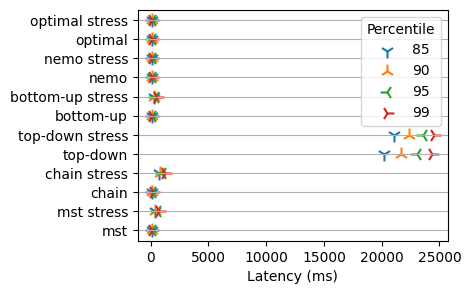

In [22]:
# Create the dot plot using matplotlib
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4, 3))
color_list = sns.color_palette(n_colors=len(percentiles))
i = 0
for perc in percentiles:
    mask = df["percentile"] == perc
    ax.scatter(df.loc[mask, "value"], df.loc[mask, "approach"], color=color_list[i], label=str(perc), marker=str(i + 1),
               s=100)
    i = i + 1

ax.set_xlabel("Latency (ms)")
ax.legend(title="Percentile")
ax.grid(axis='y')

plt.savefig("plots/NES/latency_percentile_scatter.svg", bbox_inches='tight')
plt.show()

## Heatmap Quantiles

In [23]:
percentiles = [85, 90, 95, 99]
value_dict = {}

for k, v in latency_vals.items():
    values = []
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        values.append(perc)
    value_dict[k] = values

df = pd.DataFrame.from_dict(value_dict, columns=percentiles, orient='index').astype(int)
df

,85,90,95,99
mst,125,130,135,141
mst stress,358,421,522,735
chain,140,145,158,178
chain stress,746,841,991,1283
top-down,20213,21677,23086,24366
top-down stress,21072,22335,23553,24506
bottom-up,123,128,134,139
bottom-up stress,311,332,382,585
nemo,136,140,153,164
nemo stress,134,140,151,161


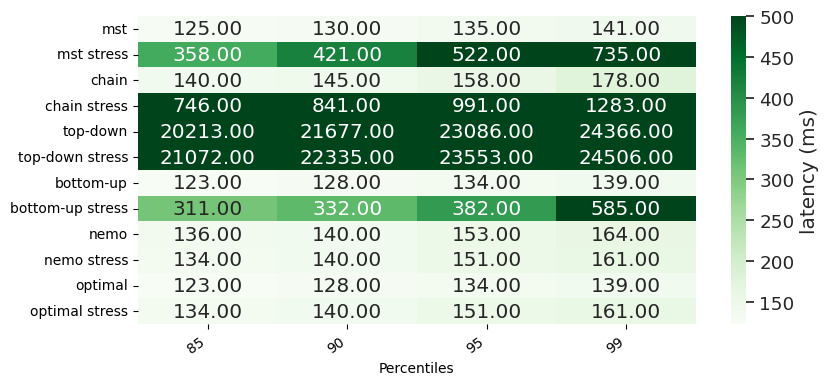

In [24]:
# create the heatmap
fig, ax = plt.subplots(figsize=(9, 4))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='Greens', vmax=500, cbar_kws={'label': 'latency (ms)'}, cbar=True, fmt='.2f', ax=ax)

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')
plt.xlabel("Percentiles")
# show the plot
plt.savefig("plots/NES/latency_heatmap_perc.svg", bbox_inches='tight')
# plt.title("Latency ({0} ms)".format(waitTime))
plt.show()

## 90th Percentiles All Experiments

In [25]:
latency_results.keys()

dict_keys(['sliding [1s, 50ms]', 'sliding , 50ms]', 'tumbling [1s]', 'tumbling [1m]'])

In [26]:
rows = []

for experiment in latency_results.keys():
    for approach, val in latency_results[experiment]['90th percentile'].items():
        if approach.startswith("top-down"): # and experiment.startswith("sliding"):
            continue
        row = {"experiment": experiment, "approach": approach, "value": val}
        rows.append(row)
df = pd.DataFrame(rows)

In [27]:
df

,experiment,approach,value
0,"sliding [1s, 50ms]",mst,130.0
1,"sliding [1s, 50ms]",mst stress,421.0
2,"sliding [1s, 50ms]",chain,145.0
3,"sliding [1s, 50ms]",chain stress,841.0
4,"sliding [1s, 50ms]",bottom-up,128.0
5,"sliding [1s, 50ms]",bottom-up stress,332.0
6,"sliding [1s, 50ms]",nemo,140.0
7,"sliding [1s, 50ms]",nemo stress,140.0
8,"sliding [1s, 50ms]",optimal,128.0
9,"sliding [1s, 50ms]",optimal stress,140.0


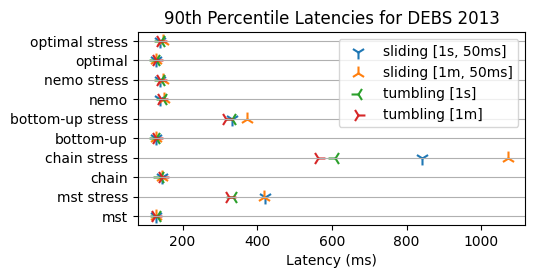

In [28]:
# Create the dot plot using matplotlib
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5, 2.5))
color_list = sns.color_palette(n_colors=len(percentiles))
i = 0
for experiment in latency_results.keys():
    mask = df["experiment"] == experiment
    ax.scatter(df.loc[mask, "value"], df.loc[mask, "approach"], color=color_list[i], label=str(experiment), marker=str(i + 1),
               s=100)
    i = i + 1

ax.set_xlabel("Latency (ms)")
ax.legend()
ax.grid(axis='y')

plt.savefig("plots/NES/latency_90th_all_no_td.svg", bbox_inches='tight')
plt.title("90th Percentile Latencies for DEBS 2013")
plt.show()

## Box plots all experiments

In [29]:
latency_results.keys()

dict_keys(['sliding [1s, 50ms]', 'sliding , 50ms]', 'tumbling [1s]', 'tumbling [1m]'])

In [30]:
rows = []

for experiment in latency_results.keys():
    for approach, values in latency_results[experiment]['latencies'].items():
        # if approach.startswith("top-down"): # and experiment.startswith("sliding"):
        #    continue
        for val in values:
            row = {"experiment": experiment, "approach": approach, "value": val}
            rows.append(row)
df = pd.DataFrame(rows)

In [31]:
df

,experiment,approach,value
0,"sliding [1s, 50ms]",mst,63
1,"sliding [1s, 50ms]",mst,135
2,"sliding [1s, 50ms]",mst,85
3,"sliding [1s, 50ms]",mst,35
4,"sliding [1s, 50ms]",mst,94
...,...,...,...
723881,tumbling [1m],optimal stress,96
723882,tumbling [1m],optimal stress,138
723883,tumbling [1m],optimal stress,138
723884,tumbling [1m],optimal stress,149


In [32]:
grouped_df = df.groupby(['approach'])['value'].agg(list)
grouped_df

approach
bottom-up           [109, 59, 114, 64, 114, 64, 120, 70, 127, 77, ...
bottom-up stress    [330, 280, 338, 288, 403, 353, 303, 360, 310, ...
chain               [125, 75, 126, 76, 126, 76, 126, 76, 126, 76, ...
chain stress        [447, 397, 407, 357, 307, 438, 388, 538, 488, ...
mst                 [63, 135, 85, 35, 94, 44, 95, 45, 100, 50, 109...
mst stress          [267, 352, 302, 252, 338, 288, 299, 249, 399, ...
nemo                [136, 86, 136, 86, 140, 90, 140, 90, 145, 95, ...
nemo stress         [134, 140, 90, 159, 109, 109, 135, 85, 135, 85...
optimal             [109, 59, 114, 64, 114, 64, 120, 70, 127, 77, ...
optimal stress      [134, 140, 90, 159, 109, 109, 135, 85, 135, 85...
top-down            [277, 385, 335, 385, 335, 385, 335, 385, 335, ...
top-down stress     [251, 251, 261, 261, 261, 261, 261, 317, 317, ...
Name: value, dtype: object

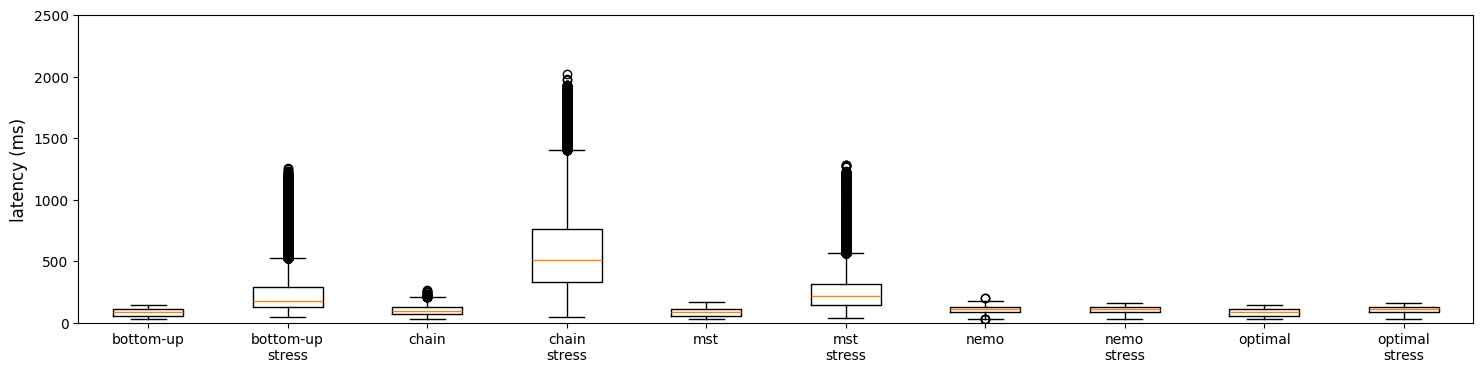

In [33]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

plot_latencies = grouped_df.to_dict()
del plot_latencies["top-down"]
del plot_latencies["top-down stress"]

# Extract the keys and values from the measurements dictionary
labels = plot_latencies.keys()
values = plot_latencies.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)
plt.ylim([0, 2500])

plt.savefig("plots/NES/latency_boxplot_all_no_td.svg", bbox_inches="tight")

# Display the plot
# plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

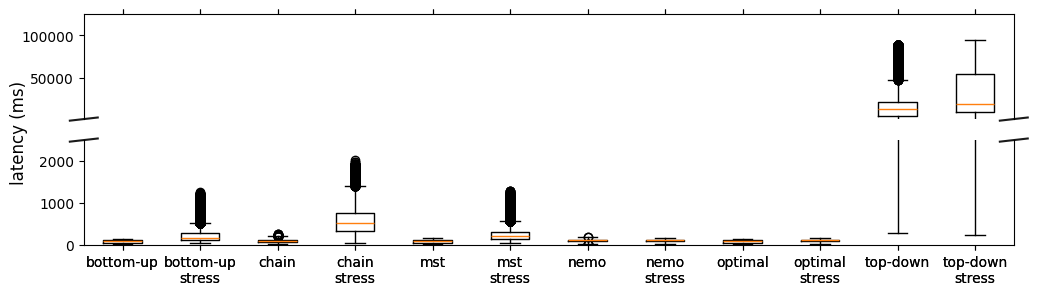

In [48]:
# Create a figure with two subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 3), sharex=True)

plot_latencies = grouped_df.to_dict()

# Extract the keys and values from the measurements dictionary
labels = plot_latencies.keys()
values = list(plot_latencies.values())
v2 = [[]] * 10 + list(values)[10:]

# Create the box plots for each key-value pair
ax1.boxplot(v2)
ax2.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax1.set_xticklabels(formatted_labels + formatted_labels)

# Set the title
ax2.set_ylim([0, 2500])
ax1.set_ylim([2000, 125000])

# remove the y-labels
ax2.set_ylabel('latency (ms)', fontsize=12)
ax2.yaxis.set_label_coords(-0.06, 1.08)

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.savefig("plots/NES/latency_boxplot_all.svg", bbox_inches="tight")
plt.show()